Loading Libraries

In [19]:
# Loading libraries for the course
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
import skimage as ski
from matplotlib import animation            # Module to plot animations

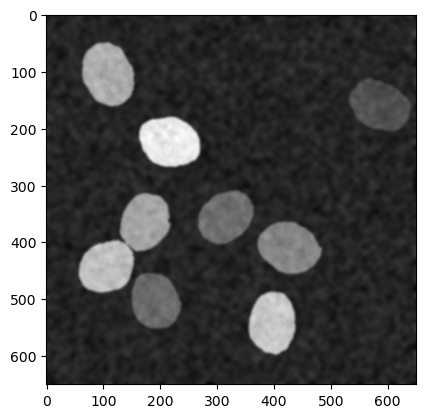

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as ski_io
from cellpose import models
import pandas as pd

# Load the image
figName = './Drug2_1000nM/rep1_FOV1.tif'
img = ski_io.imread(figName)

selected_frame = 4
selected_color_channel = 1

# Select the appropriate frame and color channel
img_to_analyze = img[selected_frame, :, :, selected_color_channel]

# Display the image to analyze
plt.imshow(img_to_analyze, cmap='gray')
plt.show()





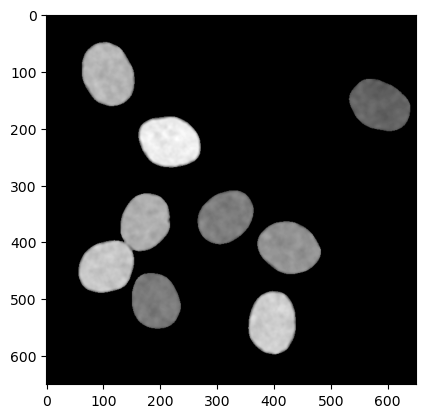

In [21]:
# Initialize Cellpose model for cytoplasm detection
model_cyto = models.Cellpose(gpu=False, model_type='cyto')

# Run Cellpose for cytoplasm detection
masks_cyto, _, _, _ = model_cyto.eval(img_to_analyze, diameter=None, channels=[0, 0])

# Apply the cytoplasm mask to the original image
img_bin_cyto = img_to_analyze * (masks_cyto > 0.5)

# Plotting the masked cytoplasm image
plt.imshow(img_bin_cyto, cmap='gray')
plt.show()

# Prepare data for the cytoplasm DataFrame
data_cyto = []
for cell_id in np.unique(masks_cyto):
    if cell_id == 0:
        continue  # skip the background

    mask = masks_cyto == cell_id
    sum_pix_intensity = img_to_analyze[mask].sum()
    cell_sizes = np.sum(mask)
    protein_concentration = sum_pix_intensity / cell_sizes

    data_cyto.append([selected_frame, cell_id, cell_sizes, protein_concentration])

df_cyto = pd.DataFrame(data_cyto, columns=['time', 'cell_ID', 'cell sizes', 'protein concentrations (AU)'])


In [22]:
# Initialize Cellpose model for nuclei detection
model_nuclei = models.Cellpose(gpu=False, model_type='nuclei')

# Run Cellpose for nuclei detection
masks_nuclei, _, _, _ = model_nuclei.eval(img_to_analyze, diameter=None, channels=[0, 0])

# Prepare data for the nuclei DataFrame
data_nuclei = []
for cell_id in np.unique(masks_nuclei):
    if cell_id == 0:
        continue  # skip the background

    mask = masks_nuclei == cell_id
    nucleus_sizes = np.sum(mask)

    data_nuclei.append([selected_frame, cell_id, nucleus_sizes])
df_nuclei = pd.DataFrame(data_nuclei, columns=['time', 'cell_ID', 'nucleus sizes'])


In [23]:

# Display the DataFrames
print("Cytoplasm DataFrame:")
print(df_cyto)

print("\nNuclei DataFrame:")
print(df_nuclei)

# Merge the Cytoplasm and Nuclei DataFrames based on the 'cell' column
df_merged = pd.merge(df_cyto, df_nuclei, on='cell_ID')

# Display the merged DataFrame
print("Merged DataFrame:")
print(df_merged)


Cytoplasm DataFrame:
   time  cell_ID  cell sizes  protein concentrations (AU)
0     4        1        8167                   115.191625
1     4        2        7425                    64.603098
2     4        3        7859                   147.939814
3     4        4        7092                    81.013677
4     4        5        6984                   111.210481
5     4        6        7816                    94.284928
6     4        7        7237                   125.468426
7     4        8        6718                    79.492111
8     4        9        7461                   128.801903

Nuclei DataFrame:
   time  cell_ID  nucleus sizes
0     4        1           7828
1     4        2           6616
2     4        3           7341
3     4        4           6615
4     4        5           6791
5     4        6           7602
6     4        7           6958
7     4        8           5773
8     4        9           7024
Merged DataFrame:
   time_x  cell_ID  cell sizes  protein co